In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Kaggle에서는 유독 seaborn을 사랑합니다.
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler  # 케글은 또한 뉴럴넷 보다는 머신러닝 기반 방법론을 많이 사용하는 편이고 (특히 트리기반), 따라서 sklearn을 자주 애용하기도 합니다.
from scipy import stats  # scipy도 많이 쓰더군요
# 커널을 구성하다보면 에러는 아니지만, warning이 뜨는 경우가 많은데요. 요 아래 두 부분을 씀으로 해서 그런 보기싫은 부분들을 제거해줍니다.
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

# data load

In [2]:
act = pd.read_csv('act.csv')
com = pd.read_csv('combat.csv')
pledge = pd.read_csv('pledge.csv')
label = pd.read_csv('train_label.csv')
trade = pd.read_csv('trade.csv')
pay = pd.read_csv('payment.csv')

In [3]:
df= pd.merge(act,pledge,how='left').fillna(0)
df= df.merge(trade,how='left').fillna(0)
df= df.merge(com,how='left').fillna(0)
df= df.merge(pay,how='left').fillna(0)
df = df.merge(label,how='left').fillna(0)

# data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 57 columns):
acc_id                     40000 non-null int64
playtime                   40000 non-null float64
solo_exp                   40000 non-null float64
party_exp                  40000 non-null float64
quest_exp                  40000 non-null float64
npc_kill                   40000 non-null float64
rich_monster               40000 non-null int64
death                      40000 non-null float64
revive                     40000 non-null float64
char_id                    40000 non-null int64
exp_recovery               40000 non-null float64
fishing                    40000 non-null float64
private_shop               40000 non-null float64
game_money_change          40000 non-null float64
enchant_count              40000 non-null float64
sum_exp                    40000 non-null float64
play_char_cnt              40000 non-null float64
combat_char_cnt            40000 non-null float

In [5]:
df_desc = df.describe().transpose()
df_desc["dtype"] = df.dtypes
df_desc.transpose()

,acc_id,playtime,solo_exp,party_exp,quest_exp,npc_kill,rich_monster,death,revive,char_id,...,enchant_scroll,etc,spell,sell_amount_weapon,buy_amount_accessory,buy_amount_weapon,pledge_cnt,num_opponent,sum_pledge,sum_spent
count,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
mean,65281.1,41.8008,9.34661,5.16967,4.2313,19.8125,4.94102,2.96588,2.65425,7.95114e+06,...,0,0,0,0,0,0,9.62764e-05,0.00116037,9.62764e-05,1.10974
std,37525.6,32.4271,17.7523,22.0324,11.6433,22.6029,6.8604,9.1806,9.06324,6.50883e+06,...,0,0,0,0,0,0,0.0192553,0.0880021,0.0192553,1.85898
min,2,0.00234066,0,0,0,0,0,0,0,63,...,0,0,0,0,0,0,0,0,0,0
25%,32792.8,12.0509,0.0682508,0,0.00260275,0.977323,0,0,0,3.46074e+06,...,0,0,0,0,0,0,0,0,0,0
50%,65359,33.0348,0.566321,0.00355663,0.0571611,14.1098,2,0.491767,0.494674,6.87504e+06,...,0,0,0,0,0,0,0,0,0,0.348521
75%,97685.8,77.9146,9.71656,0.242159,1.34126,30.3948,8,2.45883,1.9787,1.0639e+07,...,0,0,0,0,0,0,0,0,0,1.31077
max,130473,91.8941,239.28,300.769,1148.7,334.952,99,615.938,619.084,1.52794e+08,...,0,0,0,0,0,0,3.85105,11.2848,3.85105,12.5561
dtype,int64,float64,float64,float64,float64,float64,int64,float64,float64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


# data 모양

In [6]:
df.head()

,acc_id,playtime,solo_exp,party_exp,quest_exp,npc_kill,rich_monster,death,revive,char_id,...,enchant_scroll,etc,spell,sell_amount_weapon,buy_amount_accessory,buy_amount_weapon,pledge_cnt,num_opponent,sum_pledge,sum_spent
0,2,91.533663,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,6540744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,5,6.116132,2.155434,0.695285,0.111055,3.236452,9,0.245883,0.247337,3851049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,8,18.797802,31.489136,0.000000,1.561055,31.172609,2,91.960416,92.504000,26228439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.404644
3,17,28.464708,9.255848,8.823094,2.322365,30.456852,21,1.721184,1.731358,8548136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,20,25.588043,0.274902,0.080060,0.083483,34.100184,8,0.983534,0.989348,5571452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.896531


In [7]:
df.tail()

,acc_id,playtime,solo_exp,party_exp,quest_exp,npc_kill,rich_monster,death,revive,char_id,...,enchant_scroll,etc,spell,sell_amount_weapon,buy_amount_accessory,buy_amount_weapon,pledge_cnt,num_opponent,sum_pledge,sum_spent
39995,130463,49.654660,4.912516,224.327367,0.276691,0.518062,0,4.425902,3.710053,7325169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
39996,130468,1.404393,0.573432,0.000000,5.679234,0.200398,0,0.000000,0.000000,1402988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
39997,130469,57.570756,0.206178,0.000002,0.029401,17.500566,11,1.229417,1.236684,14428779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360255
39998,130470,23.055454,4.964914,0.232202,0.117344,25.229256,4,0.737650,0.742011,18978761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.392909
39999,130473,72.550949,0.065882,0.011411,0.004433,29.923582,8,5.655320,5.688749,3148312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.955971


# Key Takeaways from EDA
잔존유저는 두드러지는 특징을 보인다.

### acc_id 
(1) playtime 과 잔존여부는 크게 관계가 없다고 볼 수 있다.

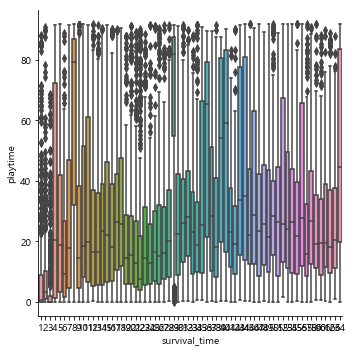

In [8]:
sns.catplot(x='survival_time',y='playtime',data=df,kind='box')

### (2).playtime이 짧은 유저가 결제한금액이 더 많으며 큰 금액을 결제했다는 것을 알 수 있다.

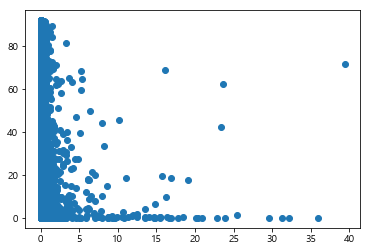

In [9]:
plt.scatter(x='amount_spent',y='playtime',data=df)
plt.show()

### (3) 경험치획득을 자주한 유저가 잔존여부가 더 높다는 것을 알 수 있다.

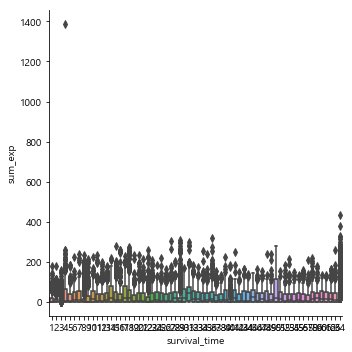

In [10]:
sns.catplot(x='survival_time',y='sum_exp',data=df,kind='box')

### 경험치획득 초기에 결제를 많이 한다.

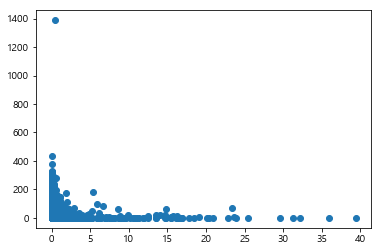

In [11]:
plt.scatter(x='amount_spent',y='sum_exp',data=df)
plt.show()

### 판매량이 많을 수록 잔존한다.

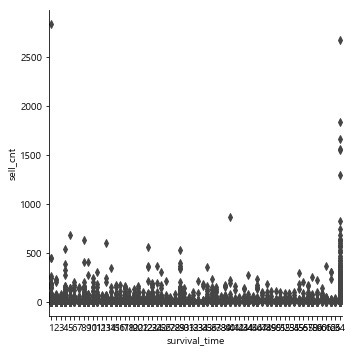

In [12]:
sns.catplot(x='survival_time',y='sell_cnt',data=df,kind='box')

### 판매량보다 구매량이 잔존하는 유저와 관계가 없는 것을 볼 수 있다.

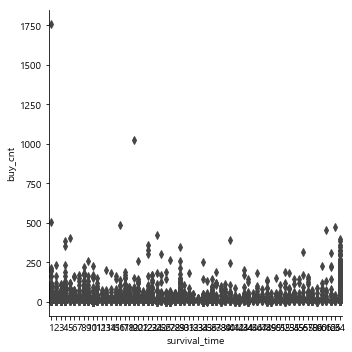

In [13]:
sns.catplot(x='survival_time',y='buy_cnt',data=df,kind='box')

### item type 별 판매량

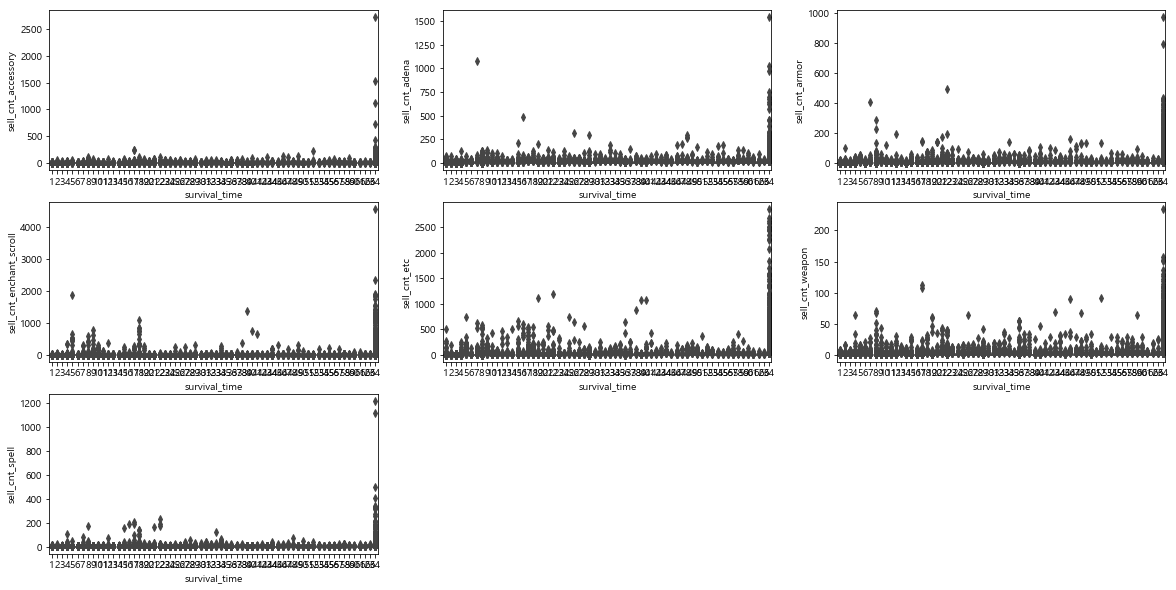

In [14]:
sell_item = ['sell_cnt_accessory', 'sell_cnt_adena', 'sell_cnt_armor', 
             'sell_cnt_enchant_scroll', 'sell_cnt_etc', 'sell_cnt_weapon','sell_cnt_spell']

plt.figure(figsize=(20, 10))
for i in range(len(sell_item)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df[sell_item[i]], x= 'survival_time', data = df)
plt.show()

### item type 별 구매량

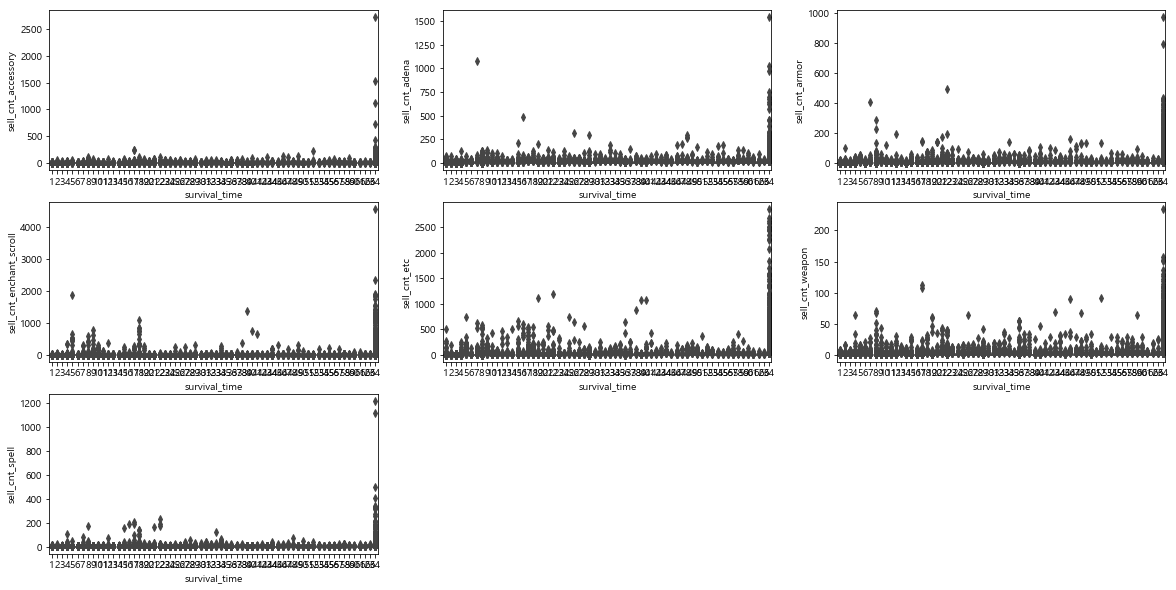

In [15]:
buy_item = ['buy_cnt_accessory', 'buy_cnt_adena', 'buy_cnt_armor', 
             'buy_cnt_enchant_scroll', 'buy_cnt_etc', 'buy_cnt_weapon','buy_cnt_spell']

plt.figure(figsize=(20, 10))
for i in range(len(buy_item)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df[sell_item[i]], x= 'survival_time', data = df)
plt.show()

### party 참여한 유저와 하지 않은 유저

In [16]:
print("party 참여 0회 유저 수: {}명".format(len(df[df["party_exp"]==0])))
print("party 참여 1회 이상 유저 수: {}명".format(len(df[df["party_exp"]!=0])))

party 참여 0회 유저 수: 18065명
party 참여 1회 이상 유저 수: 21935명


In [17]:
df["party_exp"].describe().reset_index()

,index,party_exp
0,count,40000.000000
1,mean,5.169671
2,std,22.032399
3,min,0.000000
4,25%,0.000000
5,50%,0.003557
6,75%,0.242159
7,max,300.769341


### Party 에 많이 참여할수록 잔존 가능성이 높다.

In [18]:
counts_base = df[df["party_exp"] >= 0].groupby('survival_time').size().reset_index(name='id_counts')
counts_100 = df[df["party_exp"] >= 50].groupby('survival_time').size().reset_index(name='id_counts')
counts_200 = df[df["party_exp"] >= 100].groupby('survival_time').size().reset_index(name='id_counts')
counts_500 = df[df["party_exp"] >= 200].groupby('survival_time').size().reset_index(name='id_counts')

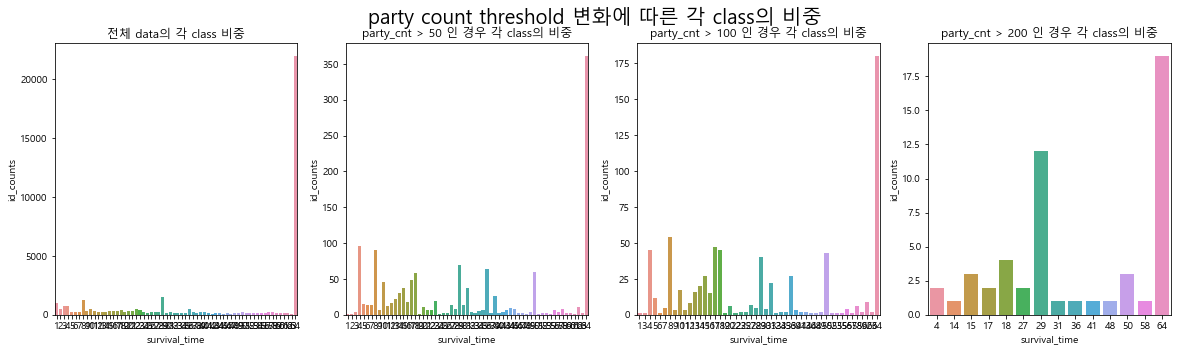

In [19]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("party count threshold 변화에 따른 각 class의 비중", fontsize=20)
ax1 = plt.subplot(1, 4, 1)
ax1.set_title("전체 data의 각 class 비중")
sns.barplot(x = 'survival_time', y = 'id_counts', data = counts_base, ax = ax1)

ax2 = plt.subplot(1, 4, 2)
ax2.set_title("party_cnt > 50 인 경우 각 class의 비중")
sns.barplot(x = 'survival_time', y = 'id_counts', data = counts_100, ax = ax2)

ax3 = plt.subplot(1, 4, 3)
ax3.set_title("party_cnt > 100 인 경우 각 class의 비중")
sns.barplot(x = 'survival_time', y = 'id_counts', data = counts_200, ax = ax3)

ax4 = plt.subplot(1, 4, 4)
ax4.set_title("party_cnt > 200 인 경우 각 class의 비중")
sns.barplot(x = 'survival_time', y = 'id_counts', data = counts_500, ax = ax4)

In [20]:
df.columns

Index(['acc_id', 'playtime', 'solo_exp', 'party_exp', 'quest_exp', 'npc_kill',
       'rich_monster', 'death', 'revive', 'char_id', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count', 'sum_exp',
       'play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'same_pledge_cnt',
       'temp_cnt', 'etc_cnt', 'combat_play_time', 'non_combat_play_time',
       'sum_pled', 'survival_time', 'amount_spent', 'sell_cnt', 'buy_cnt',
       'sell_cnt_accessory', 'sell_cnt_adena', 'sell_cnt_armor',
       'sell_cnt_enchant_scroll', 'sell_cnt_etc', 'sell_cnt_spell',
       'sell_cnt_weapon', 'buy_cnt_accessory', 'buy_cnt_adena', 'armor',
       'buy_cnt_enchant_scroll', 'buy_cnt_etc', 'buy_cnt_spell',
       'buy_cnt_weapon', 'sell_amount_accessory', 'adena', 'enchant_scroll',
       'etc', 'spell', 'sell_amount_weapon', 'buy_amount_accessory',
       'buy_amount_weapon', 'pledge_cnt', 'num_opponent', 'sum_pled

### 총 결제금액이 많을수록 잔존가능성이 있다.(크진않다.)

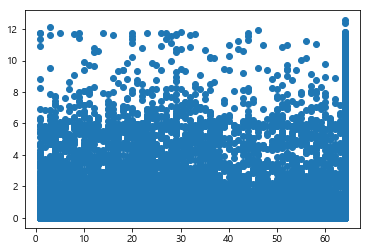

In [21]:
plt.scatter(x='survival_time',y='sum_spent',data=df)
plt.show()

### Heatmap

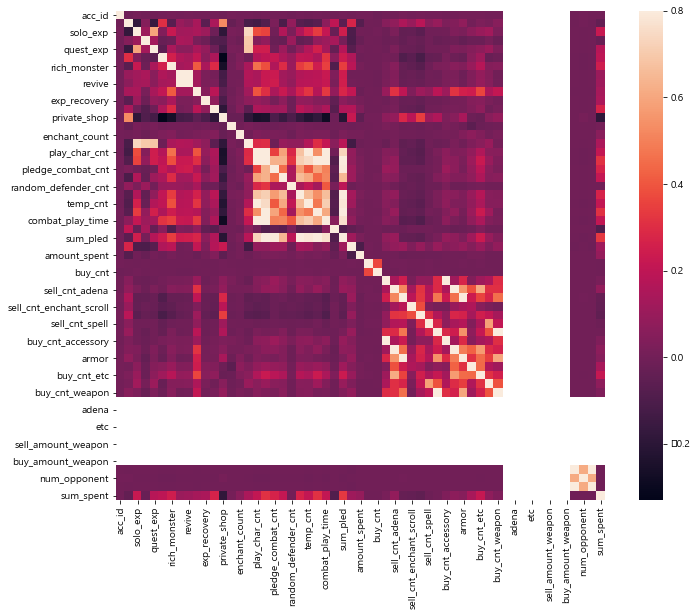

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

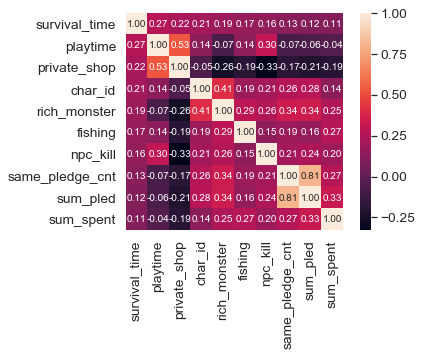

In [23]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'survival_time')['survival_time'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

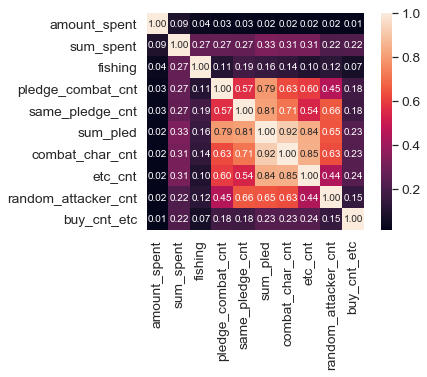

In [24]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'amount_spent')['amount_spent'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [25]:
print("Skewness: %f" % df['survival_time'].skew())
print("Kurtosis: %f" % df['survival_time'].kurt())
print("Skewness: %f" % df['amount_spent'].skew())
print("Kurtosis: %f" % df['amount_spent'].kurt())

Skewness: -0.735823
Kurtosis: -1.130510
Skewness: 26.937768
Kurtosis: 963.637599
